In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('stress.csv')
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [3]:
data.shape

(2838, 116)

In [4]:
data.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [5]:
data.info

<bound method DataFrame.info of              subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     He said he had not felt that way before, sugge...  33181      1   
1     Hey there r/assistance, Not sure if this is th...   2606      0   
2     My mom then hit me with the newspaper and it s...  38816      1   
3     until i met my new boyfriend, he is amazing, h...    239      1   
4     October 

In [6]:
data.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [7]:
data.corr()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
id,1.000000,-0.057570,0.198152,-0.004089,0.001155,0.103680,0.057690,0.013110,0.055287,-0.043653,...,0.027462,-0.042197,-0.023827,-0.044492,-0.058451,0.018026,-0.031343,-0.007265,0.100821,0.034676
label,-0.057570,1.000000,0.023831,-0.006504,-0.053421,-0.092786,0.100473,-0.247933,-0.403804,0.275282,...,-0.297439,-0.032659,-0.012440,0.144963,-0.049756,-0.165470,0.097125,-0.038507,-0.058567,-0.305157
confidence,0.198152,0.023831,1.000000,0.029101,-0.035109,0.034465,-0.005430,0.040150,-0.019701,0.030784,...,0.054247,-0.000609,-0.043655,0.019157,-0.064465,0.066168,-0.006815,-0.056471,0.040245,0.018656
social_timestamp,-0.004089,-0.006504,0.029101,1.000000,-0.015673,0.001516,0.013800,0.001789,-0.013092,0.023516,...,-0.001197,-0.002790,-0.024561,-0.006740,0.007107,0.010445,0.009877,-0.024676,0.002347,0.027996
social_karma,0.001155,-0.053421,-0.035109,-0.015673,1.000000,-0.014104,0.008587,-0.032604,0.049560,-0.073504,...,-0.031136,-0.028579,-0.003248,-0.006415,-0.003452,0.007040,0.099256,0.794517,-0.020001,0.004918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lex_dal_avg_pleasantness,0.018026,-0.165470,0.066168,0.010445,0.007040,-0.105369,-0.064109,-0.070831,0.085443,-0.016854,...,0.374458,0.074514,0.016777,0.108321,-0.026838,1.000000,-0.080428,0.012151,-0.078536,0.320488
social_upvote_ratio,-0.031343,0.097125,-0.006815,0.009877,0.099256,-0.006797,-0.017517,-0.060588,-0.100387,0.086029,...,-0.103184,0.008844,0.004309,0.051622,-0.016455,-0.080428,1.000000,0.011538,-0.014422,-0.073087
social_num_comments,-0.007265,-0.038507,-0.056471,-0.024676,0.794517,-0.042912,0.007982,-0.045950,0.055352,-0.083499,...,-0.017950,-0.048020,-0.008879,-0.033903,-0.002724,0.012151,0.011538,1.000000,-0.045006,0.001583
syntax_fk_grade,0.100821,-0.058567,0.040245,0.002347,-0.020001,0.967380,0.564947,0.270828,0.120024,-0.080276,...,-0.132731,-0.176478,-0.005930,0.000508,0.012685,-0.078536,-0.014422,-0.045006,1.000000,0.070168


In [8]:
data.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

Next, prepare the text column of this dataset to clean the text column
with stopwords, links, special symbols and language errors:

In [9]:
import nltk
import re
import string
# nltk.download('stopwords')
stemmer= nltk.SnowballStemmer("english")

from nltk.corpus import stopwords
stopword= set(stopwords.words('english'))

In [10]:
def clean(text):
    text= str(text).lower()
    text= re.sub('\[.*?\]', '',text)
    text= re.sub('https?://\s+|www\.\s+', '', text)
    text= re.sub('<.*?>+', '', text)
    text= re.sub('[%s]'%re.escape(string.punctuation),'', text)
    text= re.sub('\n', '', text)
    text= re.sub('\w*\d\w*', '', text)
    text= [word for word in text.split(' ') if word not in stopword]
    text= " ".join(text)
    text= [stemmer.stem(word) for word in text.split(' ')]
    text= " ".join(text)
    return text
data["text"] = data["text"].apply(clean)

 Now, we look at the most used words by the people sharing about their life problems 
  on social media by visualizing a word cloud of the text column:

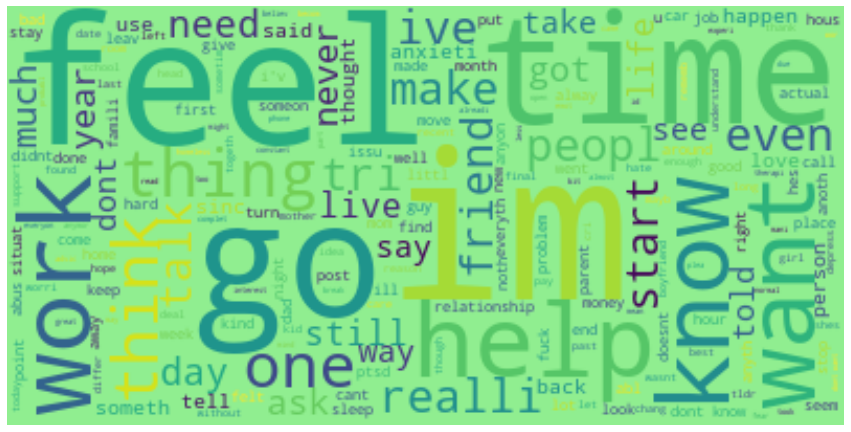

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text= " ".join(i for i in data.text)
stopwords= set(STOPWORDS)
wordclouds= WordCloud(stopwords= stopwords, background_color='lightgreen').generate(text)

plt.figure(figsize=(15,10))
plt.imshow( wordclouds, interpolation='bilinear')
plt.axis('off')
plt.show()

I use Stress and No stress labels instead of 1 and 0.

In [12]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data= data[["text", "label"]]
data.tail()

,text,label
2833,week ago precious ignor jan happi year prec...,No Stress
2834,dont abil cope anymor im tri lot thing trigger...,Stress
2835,case first time your read post look peopl will...,No Stress
2836,find normal good relationship main problem see...,No Stress
2837,talk mom morn said sister trauma wors mine did...,Stress


In [13]:
data.shape

(2838, 2)

Here, now we split the dataset into training and test sets:

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 

In [15]:
z = np.array(data["text"])
y = np.array(data["label"])
cv= CountVectorizer()
x= cv.fit_transform(z)
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size= 0.3, random_state= 32)

In [16]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [17]:
user= input('Enter a text: ')
data= cv.transform([user]).toarray()
pred= model.predict(data)
pred

Enter a text: I feel this is wrong


array(['No Stress'], dtype='<U9')

In [18]:
user= input('Enter a text: ')
data= cv.transform([user]).toarray()
pred= model.predict(data)
pred

Enter a text: I feel anxiety


array(['Stress'], dtype='<U9')